In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/Computer Vision Lab/Lab4_facedata'

# Iterate through each folder and file
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        # Read file using OpenCV
        img = cv2.imread(file_path)
        if img is not None:
            # Process the image (e.g., display, save, etc.)
            cv2_imshow(img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f"Failed to read {file_path}")


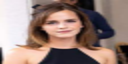

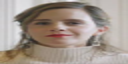

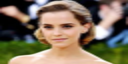

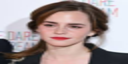

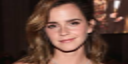

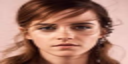

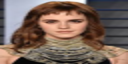

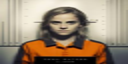

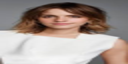

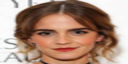

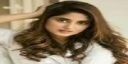

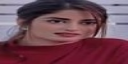

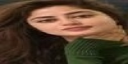

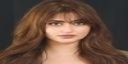

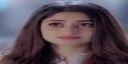

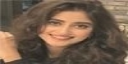

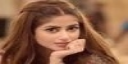

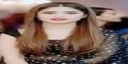

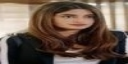

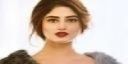

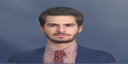

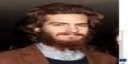

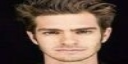

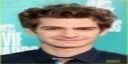

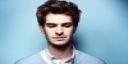

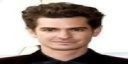

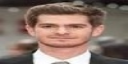

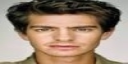

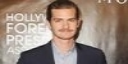

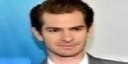

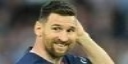

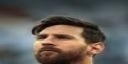

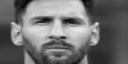

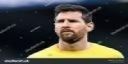

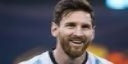

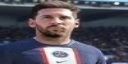

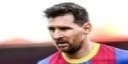

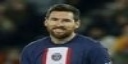

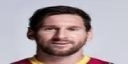

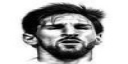

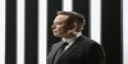

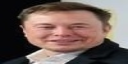

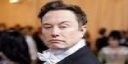

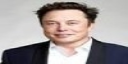

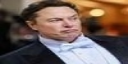

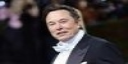

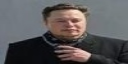

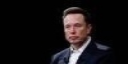

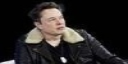

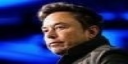

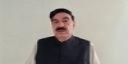

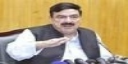

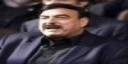

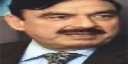

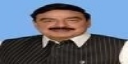

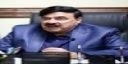

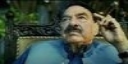

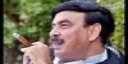

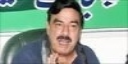

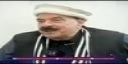

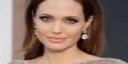

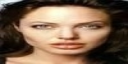

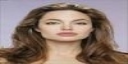

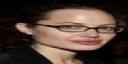

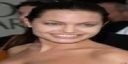

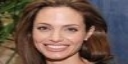

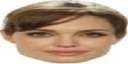

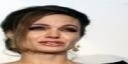

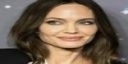

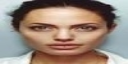

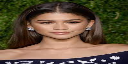

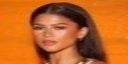

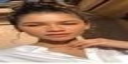

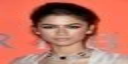

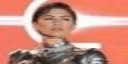

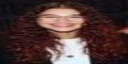

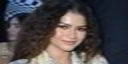

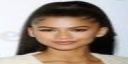

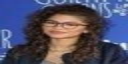

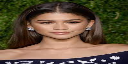

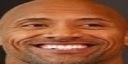

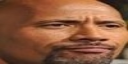

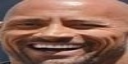

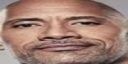

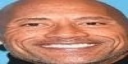

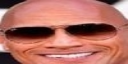

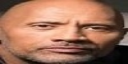

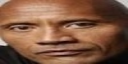

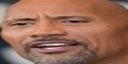

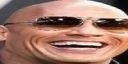

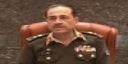

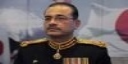

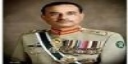

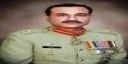

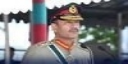

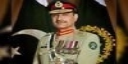

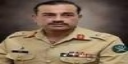

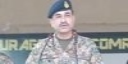

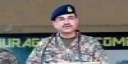

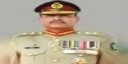

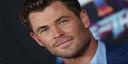

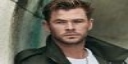

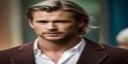

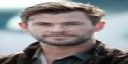

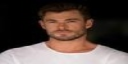

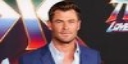

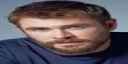

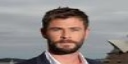

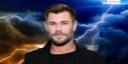

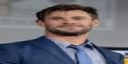

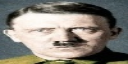

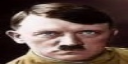

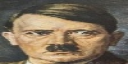

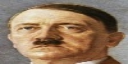

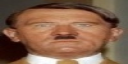

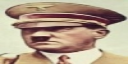

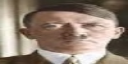

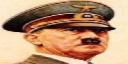

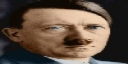

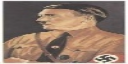

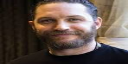

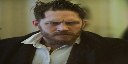

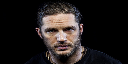

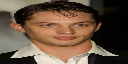

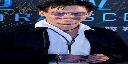

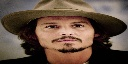

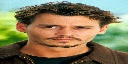

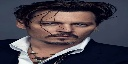

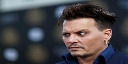

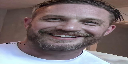

In [ ]:
# Define the target size for resizing
target_width = 128
target_height = 64

# Iterate through each folder and file
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        # Read file using OpenCV
        img = cv2.imread(file_path)
        if img is not None:
            # Resize the image
            resized_img = cv2.resize(img, (target_width, target_height))
            # Process the resized image (e.g., display, save, etc.)
            cv2_imshow(resized_img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f"Failed to read {file_path}")

In [ ]:

import numpy as np
from sklearn import preprocessing

# Initialize lists to store features and labels
features = []
labels = []

# Define the target size for resizing
target_width = 128
target_height = 64

# Iterate through each folder and file
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        # Read file using OpenCV
        img = cv2.imread(file_path)
        winSize = (64,64)
        blockSize = (16,16)
        blockStride = (8,8)
        cellSize = (8,8)
        nbins = 9
        nlevels = 64
        if img is not None:
            # Resize the image
            img = cv2.resize(img, (target_width, target_height))
            # Convert image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Calculate HOG features
            hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,
                        nlevels)
            hog_features = hog.compute(gray)
            # Flatten the HOG features
            hog_features = hog_features.flatten()
            # Append features to the list
            features.append(hog_features)
            # Extract label from the folder name
            label = os.path.basename(root)
            labels.append(label)
        else:
            print(f"Failed to read {file_path}")

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Scale features
features = preprocessing.scale(features)

# Encode labels
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Now 'features' contains the HOG features of all images,
# and 'labels' contains the corresponding labels.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [ ]:
import cv2
import os
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize lists to store features and labels
features = []
labels = []

# Define HOG parameters
winSize = (64, 64)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 9

# Instantiate HOG descriptor
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)

# Define the target size for resizing
target_width = 128
target_height = 64

# Iterate through each folder and file
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        # Read file using OpenCV
        img = cv2.imread(file_path)
        if img is not None:
            # Resize the image
            img = cv2.resize(img, (target_width, target_height))
            # Convert image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Calculate HOG features
            hog_features = hog.compute(gray)
            # Flatten the HOG features
            hog_features = hog_features.flatten()
            # Append features to the list
            features.append(hog_features)
            # Extract label from the folder name
            label = os.path.basename(root)
            labels.append(label)
        else:
            print(f"Failed to read {file_path}")

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Now 'features_scaled' contains the standardized HOG features of all images,
# and 'labels_encoded' contains the corresponding encoded labels.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_encoded, test_size=0.2, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.46153846153846156
